In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

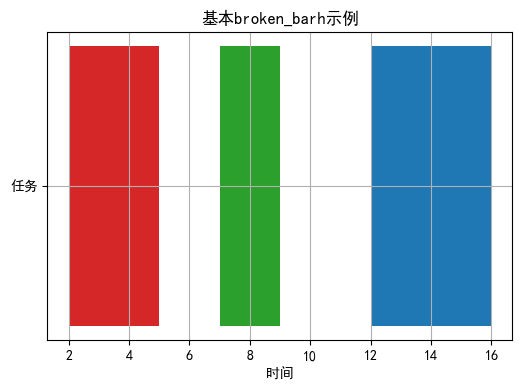

In [3]:
fig, ax = plt.subplots(figsize=(6, 4))

# 绘制三个区间段，分别从x轴的2、7、12位置开始，长度为3、2、4
xranges = [(2, 3), (7, 2), (12, 4)]
yrange = (5, 2)

ax.broken_barh(xranges, yrange, facecolors=('tab:red', 'tab:green', 'tab:blue'))

ax.set_xlabel('时间')
ax.set_yticks([6])
ax.set_yticklabels(['任务'])
ax.set_title('基本broken_barh示例')
ax.grid(True)

plt.show()

# 2、使用示例：

### 示例1：多个任务的时间线

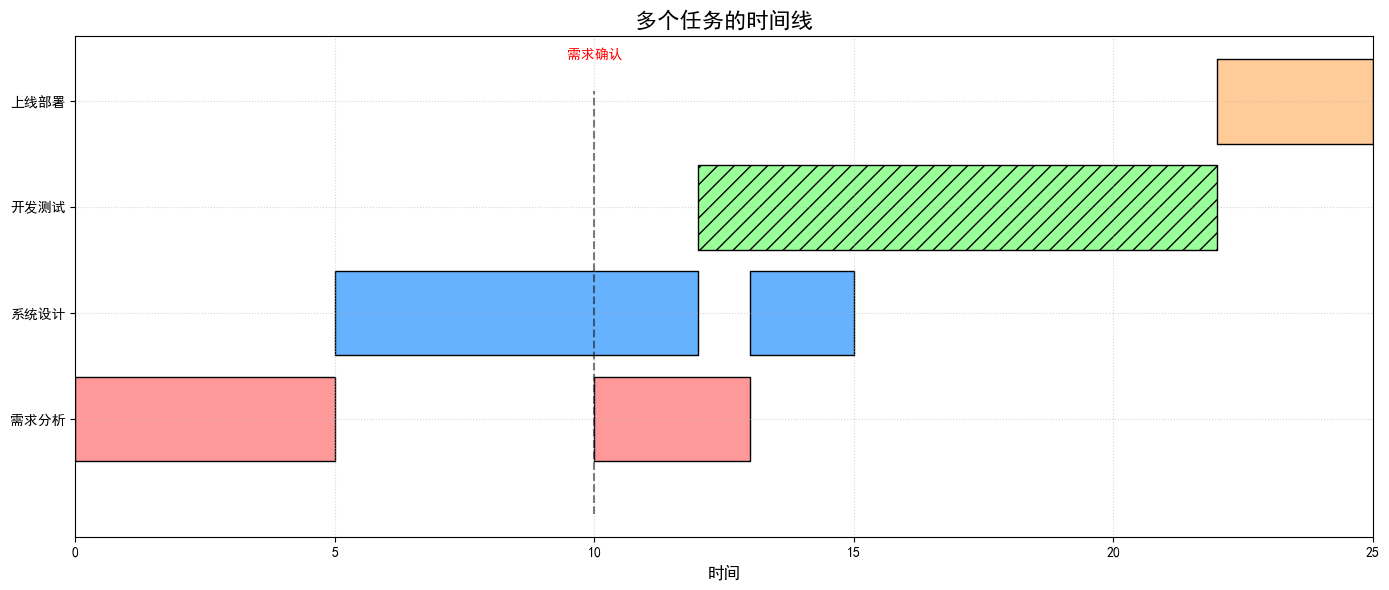

In [4]:
import matplotlib.pyplot as plt

# 定义项目阶段数据（名称、时间段、颜色）
phases = [
    {'name': '需求分析', 'ranges': [(0, 5), (10, 3)], 'color': '#FF9999'},
    {'name': '系统设计', 'ranges': [(5, 7), (13, 2)], 'color': '#66B2FF'},
    {'name': '开发测试', 'ranges': [(12, 10)], 'color': '#99FF99'},
    {'name': '上线部署', 'ranges': [(22, 3)], 'color': '#FFCC99'}
]

fig, ax = plt.subplots(figsize=(14, 6))

# 绘制每个阶段
for i, phase in enumerate(phases):
    # 绘制水平断条图
    ax.broken_barh(phase['ranges'], (i + 0.5, 0.8),
                   facecolor=phase['color'], edgecolor='black',
                   hatch='//' if '测试' in phase['name'] else None)  # 测试阶段添加斜线填充

# 设置y轴
ax.set_yticks([i + 0.9 for i in range(len(phases))])
ax.set_yticklabels([phase['name'] for phase in phases])

# 添加里程碑标记
ax.plot([10, 10], [0, len(phases)], 'k--', alpha=0.5)  # 需求分析结束线
ax.text(10, len(phases)+0.3, '需求确认', ha='center', color='red')

ax.set_title('多个任务的时间线', fontsize=16)
ax.set_xlabel('时间', fontsize=12)
ax.set_xlim(0, 25)
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

### 示例2：样式定制与美化

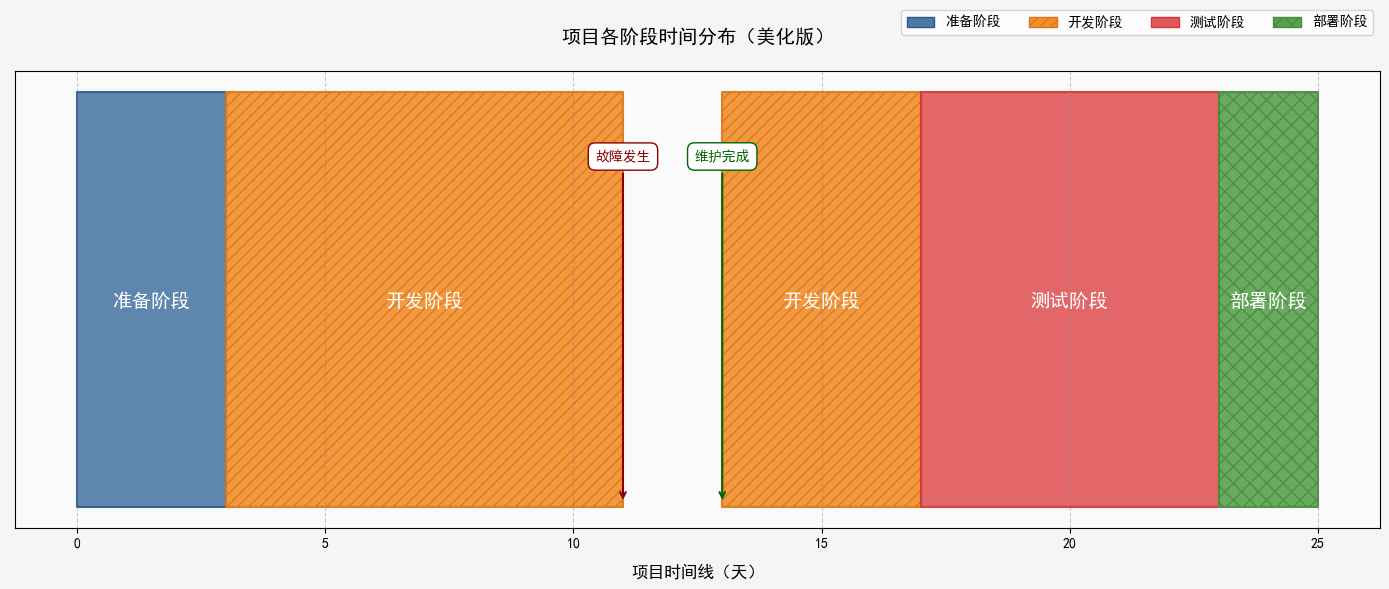

In [5]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

# 数据准备
phases = {
    '准备阶段': [(0, 3)],
    '开发阶段': [(3, 8), (13, 4)],  # 有中断
    '测试阶段': [(17, 6)],
    '部署阶段': [(23, 2)]
}

# 自定义颜色和样式
colors = ['#4E79A7', '#F28E2B', '#E15759', '#59A14F']
edge_colors = ['#2E5A8A', '#D9781A', '#D13739', '#498D3F']
hatches = ['', '///', '', 'xx']

fig, ax = plt.subplots(figsize=(14, 6), facecolor='#F5F5F5')

# 循环绘制每个阶段的水平断条
for i, (phase, periods) in enumerate(phases.items()):
    ax.broken_barh(
        periods,                # 当前阶段的时间区间列表
        (1, 6),                 # y轴参数：(起始位置, 条块高度)，所有阶段在同一水平轨道
        facecolors=colors[i],   # 填充色
        edgecolors=edge_colors[i],  # 边框色
        linewidth=1.5,          # 边框线宽
        alpha=0.9,              # 透明度
        hatch=hatches[i]        # 填充图案
    )
    
    # 在每个阶段条的中心位置添加阶段名称标签
    for start, duration in periods:
        ax.text(
            start + duration/2,  # 文本x坐标：阶段条的水平中心（起始位置+一半持续时间）
            4,                   # 文本y坐标：阶段条的垂直中心（1+6/2=4）
            phase,               # 显示的文本内容（阶段名称）
            ha='center',         # 水平对齐：居中
            va='center',         # 垂直对齐：居中
            fontsize=14,         # 字体大小
            fontweight='bold',   # 字体粗细
            color='white'        # 文本颜色
        )

# 添加事件标记
ax.annotate(
    '故障发生', 
    xy=(11, 1),  # 箭头指向的位置
    xytext=(11, 6),  # 文本位置
    arrowprops=dict(
        arrowstyle='->', 
        color='darkred',
        linewidth=1.5,
        shrinkB=5  # 箭头与目标点的距离
    ),
    ha='center',
    color='darkred',
    fontweight='bold',
    bbox=dict(facecolor='white', edgecolor='darkred', pad=3, boxstyle='round,pad=0.5')  # 文本背景框
)
ax.annotate(
    '维护完成', 
    xy=(13, 1),  # 箭头指向的位置
    xytext=(13, 6),  # 文本位置
    arrowprops=dict(
        arrowstyle='->', 
        color='darkgreen',
        linewidth=1.5,
        shrinkB=5
    ),
    ha='center',
    color='darkgreen',
    fontweight='bold',
    bbox=dict(facecolor='white', edgecolor='darkgreen', pad=3, boxstyle='round,pad=0.5')
)


# 创建图例
legend_elements = [Patch(facecolor=colors[i], edgecolor=edge_colors[i],
                         label=phase, hatch=hatches[i]) 
                   for i, phase in enumerate(phases.keys())]
ax.legend(handles=legend_elements, loc='upper right', 
          bbox_to_anchor=(1, 1.15), ncol=4)

# 美化图表
ax.set_xlabel('项目时间线（天）', fontsize=12, labelpad=10)
ax.set_title('项目各阶段时间分布（美化版）', 
             fontsize=14, pad=20, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.4, color='gray')
ax.set_facecolor('#FAFAFA')

# 隐藏y轴刻度
ax.set_yticks([])
plt.tight_layout()
plt.show()